# Exercícios de revisão

## Questão 1

1. Crie um array com 20 números entre 0 e 10 igualmente espaçados.
2. Crie um array contendo o quadrado dos números gerados no passo 1.
3. Crie um array elevando ao cubo números gerados no passo 1 e dividindo por 10.
4. Exiba ambos os resultados em um mesmo gráfico de linha.

In [1]:
# opcional
import seaborn as sns
sns.set_theme()
# ------

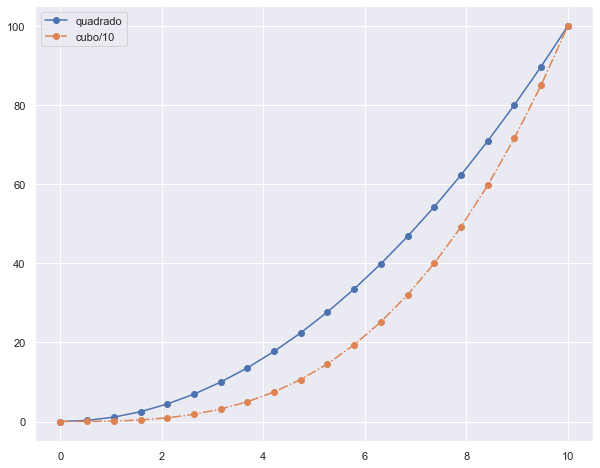

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# comando mágico do jupyter
%matplotlib inline

# 1
x = np.linspace(0, 10, 20)

# 2
# x*x == x**2
y1 = x**2

# 3
y2 = (x**3)/10

# 4 
plt.figure(figsize=(10, 8));

plt.plot(x, y1, marker='o');
plt.plot(x, y2, marker='o', ls='-.');

plt.legend(['quadrado', 'cubo/10']);

## Questão 2

Abra o dataset ```titanic``` utilizando o comando ```sns.load_dataset('titanic')```.

1. Visualize as primeiras 10 linhas do DataFrame.
2. Visualize a descrição resumida do DataFrame.
3. Descubra quantos valores 'NaN' temos por coluna.
4. Remova a coluna com maior quantidade de termos 'NaN'.
5. Na segunda coluna com maior quantidade de termos 'NaN', substitua os valores faltantes pela média da coluna.
6. Remova todas as linhas restantes com termos NaN.
7. Descubra a quantidade de sobreviventes por sexo.
8. Descubra a idade média por sexo.
9. Descubra a idade média por sexo e sobrevivência.
10. Faça um gráfico de barras comparando a quantidade de sobreviventes por classe.

In [3]:
import pandas as pd

df_titanic = sns.load_dataset('titanic')

# 1 
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
# 2
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# 3 
df_nan = df_titanic.isna().sum().reset_index()
df_nan.columns = ['colunas', 'qte_nan']
df_nan

,colunas,qte_nan
0,survived,0
1,pclass,0
2,sex,0
3,age,177
4,sibsp,0
5,parch,0
6,fare,0
7,embarked,2
8,class,0
9,who,0


In [6]:
# 4 
colunas_nan_remover = df_nan[df_nan['qte_nan']==df_nan['qte_nan'].dxmax()]['colunas']

for coluna in colunas_nan_remover:
    df_titanic.drop(labels=coluna, axis=1, inplace=True)
    
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [33]:
df_nan.head()

,colunas,qte_nan
0,survived,0
1,pclass,0
2,sex,0
3,age,177
4,sibsp,0


In [40]:
# 5 opção A
qte_nan_para_preencher_media = df_nan.sort_values(by='qte_nan', ascending=False).reset_index(drop=True).iloc[1]['qte_nan']
colunas_preencher_media = df_nan[df_nan['qte_nan']==qte_nan_para_preencher_media]['colunas']

for coluna in colunas_preencher_media:
    df_titanic[coluna].fillna(df_titanic[coluna].mean(), inplace=True)
    
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [41]:
# 5 opção B
coluna_preencher_media = df_nan.sort_values(by='qte_nan', ascending=False).reset_index(drop=True).iloc[1]['colunas']

df_titanic[coluna_preencher_media].fillna(df_titanic[coluna_preencher_media].mean(), inplace=True)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [42]:
# 6
df_titanic.dropna(inplace=True)
df_titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [47]:
# 7
# survived | sex
df_titanic.groupby(by=['sex'])[['survived']].sum()

,survived
sex,
female,231
male,109


In [49]:
# 8
# age | sex
df_titanic.groupby(by=['sex'])[['age']].mean()

,age
sex,
female,28.077094
male,30.505824


In [50]:
# 9 Descubra a idade média por sexo e sobrevivência.
df_titanic.groupby(by=['sex', 'survived'])[['age']].mean()

age
sex    survived           
female 0         26.023272
       1         28.797265
male   0         31.175224
       1         27.631705

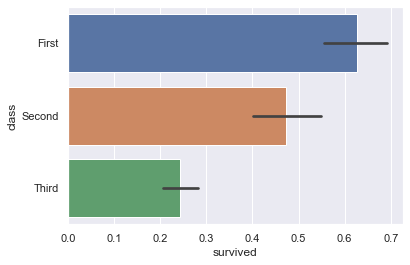

In [57]:
# 10 Faça um gráfico de barras comparando a quantidade de sobreviventes por classe.

sns.barplot(data=df_titanic, x='survived', y='class');

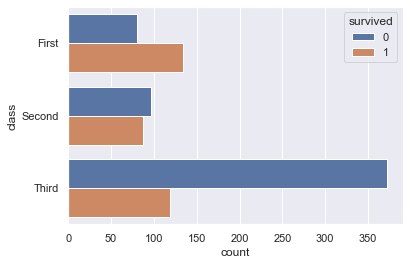

In [55]:
sns.countplot(data=df_titanic, y='class', hue='survived');

## Questão 3

Carregue o dataset ```tips``` à partir do comando ```sns.load_dataset('tips')```, que retorna um DataFrame.

1. Visualize as 10 primeiras linhas do DataFrame.
2. Crie uma nova coluna contendo o percentual do valor da gorjeta em relação ao total da conta.
3. Descubra o percentual médio de gorjeta por sexo.
4. Descubra a proporção de não-fumantes e fumantes no dataset.
5. Obtenha um DataFrame contendo os dados sobre a maior e a menor gorjeta do dataset em valores absolutos.
6. Obtenha um DataFrame contendo os dados sobre a maior e a menor gorjeta do dataset em percentual do valor da conta.

In [76]:
df_tips = sns.load_dataset('tips')
# 1
df_tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [97]:
# 2 Crie uma nova coluna contendo o percentual do valor da gorjeta em relação ao total da conta.
df_tips['percentual'] = 100*df_tips['tip']/df_tips['total_bill']

# df_tips.style.format({'percentual': '{:,.2f}%'})

In [72]:
# 3 Descubra o percentual médio de gorjeta por sexo.
df_tips.groupby(by=['sex'])[['percentual']].mean()

,percentual
sex,
Male,15.765055
Female,16.649074


In [74]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,percentual
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [85]:
df_tips['smoker'].value_counts(normalize=True)

,index,smoker
0,No,0.618852
1,Yes,0.381148


In [93]:
# 4 Descubra a proporção de não-fumantes e fumantes no dataset.

# sns.barplot(data=df_tips['smoker'].value_counts(normalize=True).reset_index(), x='smoker', y='index')

df_tips.groupby(by=['smoker']).size()/len(df_tips)
# df_tips['smoker'].value_counts(normalize=True)

smoker
Yes    0.381148
No     0.618852
dtype: float64

In [94]:
# 5 Obtenha um DataFrame contendo os dados sobre a maior e a menor gorjeta do dataset em valores absolutos.
maior_gorjeta = df_tips['tip'].max()
menor_gorjeta = df_tips['tip'].min()

df_tips[
    (df_tips['tip']==maior_gorjeta)
    | (df_tips['tip']==menor_gorjeta)
]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.0,Female,Yes,Sat,Dinner,1
92,5.75,1.0,Female,Yes,Fri,Dinner,2
111,7.25,1.0,Female,No,Sat,Dinner,1
170,50.81,10.0,Male,Yes,Sat,Dinner,3
236,12.60,1.0,Male,Yes,Sat,Dinner,2


In [95]:
# 6 Obtenha um DataFrame contendo os dados sobre a maior e a menor gorjeta do dataset em percentual do valor da conta.

In [100]:
maior_gorjeta_percentual = df_tips['percentual'].max()
menor_gorjeta_percentual = df_tips['percentual'].min()

df_tips[
    (df_tips['percentual']==maior_gorjeta_percentual)
    | (df_tips['percentual']==menor_gorjeta_percentual)
]

,total_bill,tip,sex,smoker,day,time,size,percentual
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
237,32.83,1.17,Male,Yes,Sat,Dinner,2,3.563814


## Questão 4

Ainda utilizando o dataset ```tips``` carregado anteriormente, obtenha as seguintes visualizações:

1. Gráfico de barras comparando valor médio da conta por sexo.
2. Gráfico de barras comparando valor médio da conta por tabagismo.
3. Gráfico de barra com valor da conta no eixo y, dia da semana no eixo x, subdividido por horário do dia.
4. Desafio: crie múltiplos gráficos de barras, cada um representando um dia da semana. No gráfico represente o valor total da conta contendo o sexo no eixo x, subdividido por tabagismo.

# Questão 5

1. Gere um gráfico de distribuição do valor das contas em duas colunas, cada qual representando fumante ou não-fumante. Subdivida-os por sexo. Exiba o KDE nos gráficos.
2. Repita o gráfico acima, utilizando as gorjetas ao invés das contas. Exiba o KDE nos gráficos.
3. Crie vários gráficos (em uma mesma figura) combinando cada par de características das gorjetas, e atribuindo uma cor diferente para cada sexo.
4. Repita o procedimento acima, mas com cores diferentes por tabagismo.
5. Crie um mapa de calor apresentando a correlação entre cada característica do dataset. Anote os dados no gráfico.

